# Exponential models with Mclurin Taylor's

In [1]:
import numpy as np 

import matplotlib.pyplot as plt

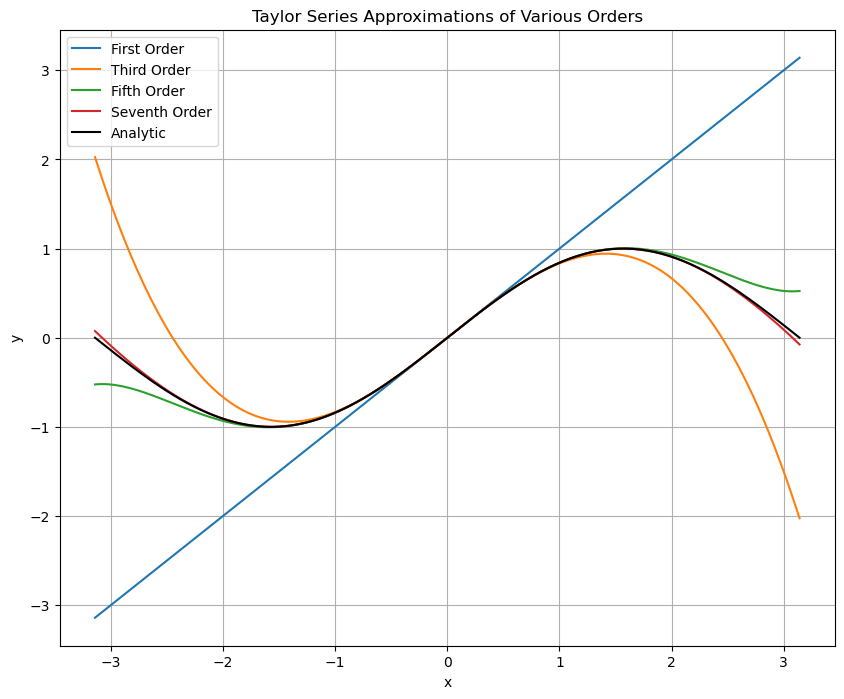

In [2]:
np.seterr(over='ignore', under='ignore')
import math


x = np.linspace(-np.pi, np.pi, 200)
y = np.zeros(len(x))

labels = ['First Order', 'Third Order', 'Fifth Order', 'Seventh Order']

plt.figure(figsize = (10,8))
for n, label in zip(range(4), labels):
    y = y + ((-1)**n * (x)**(2*n+1)) / math.factorial(2*n+1)
    plt.plot(x,y, label = label)

plt.plot(x, np.sin(x), 'k', label = 'Analytic')
plt.grid()
plt.title('Taylor Series Approximations of Various Orders')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Linear aproximation of functions (Gujarati 2010)

$$
Y = f(B_1, B_2) = B_1 e^{B_2 X}
$$

#### fixed values 
$$
B_1 = B_1^* : B_2=B_2^* 
$$

#### partial derivatives

$$
\frac{dY}{dB_1} = f_{B_1} : \frac{dY}{dB_2} = f_{B_2} 
$$


$$
    Y = f(B_1, B_2) + f_{B_1} f(B_1^*, B_2^*)(B_1-B_1*) + f_{B_2} f(B_1^*, B_2^*)(B_2-B_2^*) 
$$   

#### fixed points 

$$f(B_1^* =  \beta 1 : B_2^* = \beta 2)$$ 

$$
Y = \beta 1 e^{\beta 2 X} 
$$

$$
f_{B_1} = e^{\beta 2 X}  
$$

$$
f_{B_2} = \beta 1 X_i e^{\beta 2 X}
$$

### Mclurin Taylor Serie

$$

f(X) = \frac{f(0)}{0!} + \frac{f'(x_0)}{1!} (x-x_0) + \frac{f''(x_0)}{2!} (x-x_0)^2.............

$$

### use the teorem

$$
y_i = \beta 1 e^{\beta 2 X} + e^{\beta 2 X} (B_1 - \beta 1)  + \beta 1 X_i e^{\beta 2 X} (B_2 - \beta 2) 
$$

$$
y_i - \beta 1 e^{\beta 2 X} = e^{\beta 2 X} (B_1 - \beta 1)  + \beta 1 X_i e^{\beta 2 X} (B_2 - \beta 2)   
$$



In [3]:
Y = np.array([0.067744, 0.034928, -0.013327,  -0.062825, -0.109831, -0.154011, -0.195936, -0.236580, -0.276921, -0.317740, -0.397464, -0.446153])
x1 = np.array([1.005013, 1.051271, 1.105171, 1.161834, 1.221403, 1.284025, 1.349859, 1.419068, 1.491825, 1.568312, 1.733253, 1.822119])
x2 = np.array([0.226128, 2.365360, 4.973269, 7.842381, 10.99262, 14.44529,18.22309, 22.35031, 26.85284, 31.75832, 42.89801, 49.19721])


X = np.column_stack((x1, x2))



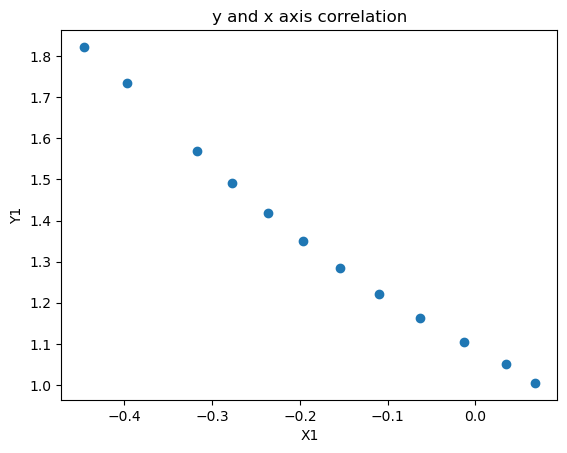

In [4]:
plt.scatter(Y, x1)
plt.title('y and x axis correlation')
plt.xlabel('X1')
plt.ylabel('Y1')
plt.show()

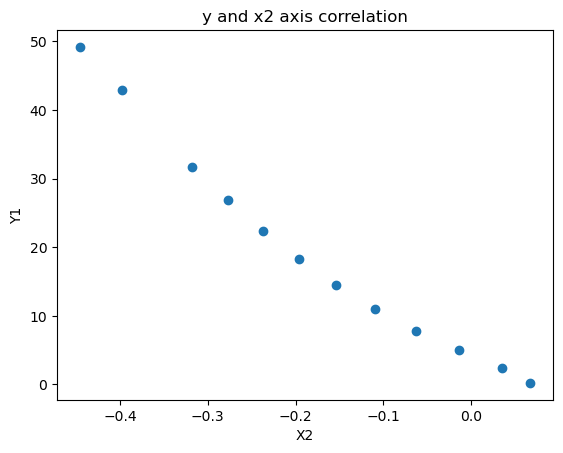

In [5]:
plt.scatter(Y, x2)
plt.title('y and x2 axis correlation')
plt.xlabel('X2')
plt.ylabel('Y1')
plt.show()

In [6]:
#coefs = np.linalg.inv(X.T@X)@(X.T@Y)

b1 = 0.45
b2 = 0.01
b3 = 0.02

x1, x2 = 2, 3  

x_pred = b1*x1*np.exp(b2*x1 + b3*x2) 
print(x_pred)

0.9749583609074628


In [7]:
import statsmodels.api as sm  

In [8]:
def nonlinear_regression(X1, X2, Y, beta1_init=0.001, beta2_init=0.25, beta3_init=0.14, tol=1e-6, max_iter=100):
    beta1, beta2, beta3 = beta1_init, beta2_init, beta3_init
    X1_norm = X1 #/ np.max(X1)  # Normalizamos X1
    X2_norm = X2 #/ np.max(X2)  # Normalizamos X2
    
    for _ in range(max_iter):
        # Calculamos los valores transformados
        exp_term = np.exp(beta2 * X1_norm + beta3 * X2_norm)
        X1_trans = np.round(exp_term, 5)
        X2_trans = np.round(0.45 * X1_norm * exp_term, 5)
        X3_trans = np.round(0.45 * X2_norm * exp_term, 5)
        Y_star = np.round(Y - beta1 * exp_term)
        
        # Ajustamos el modelo de regresión lineal
        X_matrix = np.column_stack((X1_trans, X2_trans, X3_trans))
        X_matrix = sm.add_constant(X_matrix)  # Agregamos la constante
        
        # Verificar si hay valores NaN o Inf
        if np.any(np.isnan(X_matrix)) or np.any(np.isinf(X_matrix)):
            print("Error: Se encontraron valores NaN o Inf en X_matrix. Terminando iteraciones.")
            break
        
        model = sm.OLS(Y_star, X_matrix).fit()
        
        # Obtenemos los coeficientes estimados
        alpha1, alpha2, alpha3 = model.params[1], model.params[2], model.params[3]
        beta1_new, beta2_new, beta3_new = alpha1 + 0.45, alpha2 + 0.01, alpha3 + 0.02
        
        # Condición de convergencia
        if np.abs(beta1_new - beta1) < tol and np.abs(beta2_new - beta2) < tol and np.abs(beta3_new - beta3) < tol:
            break
        
        beta1, beta2, beta3 = beta1_new, beta2_new, beta3_new
    
    return beta1, beta2, beta3, model

# Datos reales proporcionados
Y = np.array([0.067744, 0.034928, -0.013327, -0.062825, -0.109831, -0.154011, -0.195936, -0.236580, -0.276921, -0.317740, -0.397464, -0.446153])
X1 = np.array([1.005013, 1.051271, 1.105171, 1.161834, 1.221403, 1.284025, 1.349859, 1.419068, 1.491825, 1.568312, 1.733253, 1.822119])
X2 = np.array([0.226128, 2.365360, 4.973269, 7.842381, 10.99262, 14.44529, 18.22309, 22.35031, 26.85284, 31.75832, 42.89801, 49.19721])

# Ejecutamos la estimación
beta1_final, beta2_final, beta3_final, fitted_model = nonlinear_regression(X1, X2, Y, max_iter=10000)
print(f"Coeficientes estimados: beta1 = {beta1_final}, beta2 = {beta2_final}, beta3 = {beta3_final}")


Coeficientes estimados: beta1 = 245.4238652028163, beta2 = -349.26660452962096, beta3 = 3.3273293017393346


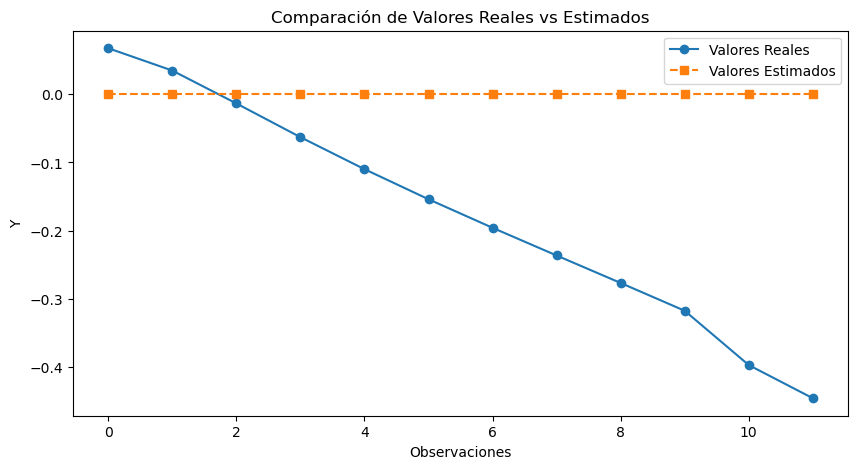

In [9]:
exp_term_final = np.exp(beta2_final * X1 + beta3_final * X2)
Y_estimated = beta1_final * exp_term_final

# Visualización
plt.figure(figsize=(10, 5))
plt.plot(Y, label='Valores Reales', marker='o')
plt.plot(Y_estimated, label='Valores Estimados', marker='s', linestyle='dashed')
plt.xlabel('Observaciones')
plt.ylabel('Y')
plt.legend()
plt.title('Comparación de Valores Reales vs Estimados')
plt.show()


In [10]:
import pandas as  pd  

rut = 'Data_sets\\Pibmexico.xlsx'

df =pd.read_excel(rut)
df.head()

,indicator,País [Año base]__Cuentas_nacionales_trimestrales,Rubro__Gasto,Años__ESTANDAR,Trimestres,value,unit,notes_ids,source_id
0,Producto interno bruto trimestral por tipo del...,México [año base 2013],Producto interno bruto (PIB),1993,Trimestre 1,1.000889e+07,en moneda nacional,5084,608
1,Producto interno bruto trimestral por tipo del...,México [año base 2013],Producto interno bruto (PIB),1993,Trimestre 2,1.017104e+07,en moneda nacional,5084,608
2,Producto interno bruto trimestral por tipo del...,México [año base 2013],Producto interno bruto (PIB),1993,Trimestre 3,1.006626e+07,en moneda nacional,5084,608
3,Producto interno bruto trimestral por tipo del...,México [año base 2013],Producto interno bruto (PIB),1993,Trimestre 4,1.041610e+07,en moneda nacional,5084,608
4,Producto interno bruto trimestral por tipo del...,México [año base 2013],Producto interno bruto (PIB),1994,Trimestre 1,1.034339e+07,en moneda nacional,5084,608


In [11]:
import warnings

warnings.simplefilter("ignore", category=RuntimeWarning)
warnings.simplefilter("ignore")



df_pib = df[['value']]
years = pd.date_range(start='1992/12/31', end='2023', freq='Q')
df_pib['Dates'] = years
df_pib.set_index('Dates', inplace=True)
df_pib.head()

,value
Dates,
1992-12-31,1.000889e+07
1993-03-31,1.017104e+07
1993-06-30,1.006626e+07
1993-09-30,1.041610e+07
1993-12-31,1.034339e+07


Text(0.5, 1.0, 'PIB Mexico')

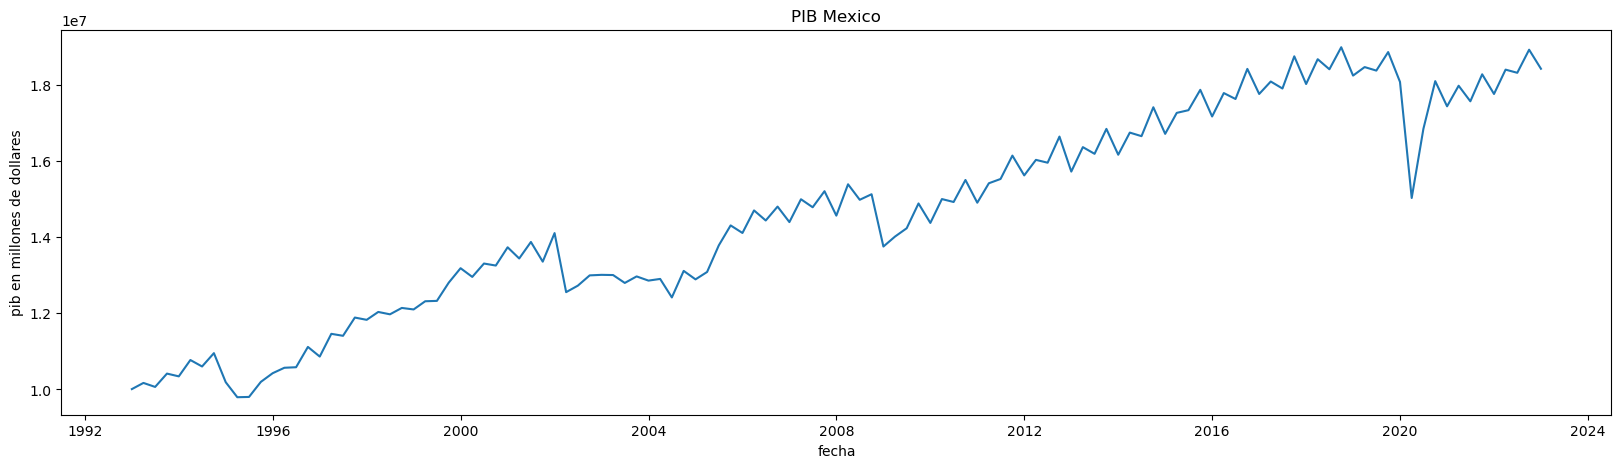

In [12]:
plt.figure(figsize=(20,5))
plt.plot(df_pib['value'])
plt.xlabel('fecha')
plt.ylabel('pib en millones de dollares')
plt.title('PIB Mexico')

In [13]:
### exponential trend 



def trend_analysis_function(df=None, test_size=0.2, trend_order=1):
    from statsmodels.tsa.deterministic import DeterministicProcess, CalendarFourier
    from sklearn.model_selection import train_test_split

    """
    Performs trend analysis on a time series DataFrame (df).

    Args:
        df (pd.DataFrame): The time series DataFrame with a date/time index.
        test_size (float, optional): Proportion of data for testing (default: 0.2).
        trend_order (int, optional): The order of the polynomial trend to fit (default: 1).

    Returns:
        tuple: A tuple containing two DataFrames:
            - y_train: Training data for trend analysis.
            - y_test: Testing data for trend analysis evaluation.
    """

    if df is None:
        raise ValueError("Please provide a time series DataFrame (df).")

    y = df.copy()  # Avoid modifying the original DataFrame

    # Create a DeterministicProcess object for trend components
    dp = DeterministicProcess(
        index=df.index,
        constant=False,
        order=trend_order,
        drop=True  # Remove trend components from X
    )
    X = dp.in_sample()  # Get the trend design matrix

    # Handle potential seasonality (consider using CalendarSeasonality from statsmodels.tsa.deterministic)
    # You might want to uncomment and modify this section if your data exhibits seasonality.
    # seasonality = CalendarFourier(freq="infer", order=1)  # Adjust order as needed
    # X = pd.concat([X, seasonality.in_sample(df.index)], axis=1)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

    # Convert to DataFrames for consistency
    X_train = pd.DataFrame(X_train, index=X_train.index)
    X_test = pd.DataFrame(X_test, index=X_test.index)
    y_train = pd.DataFrame(y_train, index=y_train.index)
    y_test = pd.DataFrame(y_test, index=y_test.index)

    return X_train, X_test, y_train, y_test

In [14]:
x_train, x_test, y_train, y_test = trend_analysis_function(df_pib, test_size=0.1)

#### Define the model 

$$ e^{b_0 + b_1 T_t}$$



#### intercept ecuation 

$$e^{b_1 T_t} $$

#### trend ecuation

$$b_0 T_t e^{b_1 T_t} $$

In [15]:
def nonlinear_regression(X1, Y, beta1_init=0.001, beta2_init=0.25, tol=1e-6, max_iter=100):
    beta1, beta2 = beta1_init, beta2_init
    X1_norm = X1 #/ np.max(X1)  # Normalizamos X1

    
    for _ in range(max_iter):
        # Calculamos los valores transformados
        exp_term = np.exp(beta2 * X1_norm )
        X1_trans = np.round(exp_term, 5)
        X2_trans = np.round(beta1 * X1_norm * exp_term, 5)
    
        Y_star = np.round(Y - beta1 * exp_term)
        
        # Ajustamos el modelo de regresión lineal
        X_matrix = np.column_stack((X1_trans, X2_trans))
        X_matrix = sm.add_constant(X_matrix)  # Agregamos la constante
        
        # Verificar si hay valores NaN o Inf
        if np.any(np.isnan(X_matrix)) or np.any(np.isinf(X_matrix)):
            print("Error: Se encontraron valores NaN o Inf en X_matrix. Terminando iteraciones.")
            break
        
        model = sm.OLS(Y_star, X_matrix).fit()
        
        # Obtenemos los coeficientes estimados
        alpha1, alpha2 = model.params[1], model.params[2]
        beta1_new, beta2_new = alpha1 + 0.45, alpha2 + 0.01
        
        # Condición de convergencia
        if np.abs(beta1_new - beta1) < tol and np.abs(beta2_new - beta2)  < tol:
            break
        
        beta1, beta2,  = beta1_new, beta2_new
    return beta1, beta2,  model  



In [16]:
beta_opt = nonlinear_regression(x_train['trend'], y_train['value'], beta1_init=0.35, beta2_init=0.3535, max_iter=100)

print(beta_opt[1])

-64088.32750029961


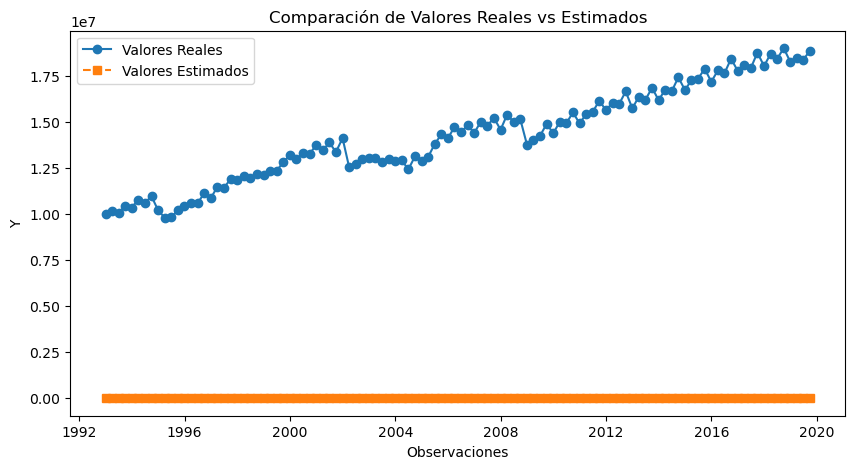

In [17]:
exp_term_final = np.exp(beta_opt[1] * x_train['trend'])
Y_estimated = beta_opt[0] * exp_term_final

# Visualización
plt.figure(figsize=(10, 5))
plt.plot(y_train, label='Valores Reales', marker='o')
plt.plot(Y_estimated, label='Valores Estimados', marker='s', linestyle='dashed')
plt.xlabel('Observaciones')
plt.ylabel('Y')
plt.legend()
plt.title('Comparación de Valores Reales vs Estimados')
plt.show()


In [18]:
from scipy.optimize import curve_fit

Y = np.array(y_train['value']) 
X = np.array(x_train['trend']) 

def model(X, beta1, beta2):
    return beta1 * np.exp(beta2 * X)

param_opt, param_cov = curve_fit(model, X, Y, p0=[0.45, 0.01], method='trf')

beta1_opt, beta2_opt = param_opt

print(f"Coeficientes estimados: beta1 = {beta1_opt}, beta2 = {beta2_opt}")


Coeficientes estimados: beta1 = 10323917.92497354, beta2 = 0.00563140135854411


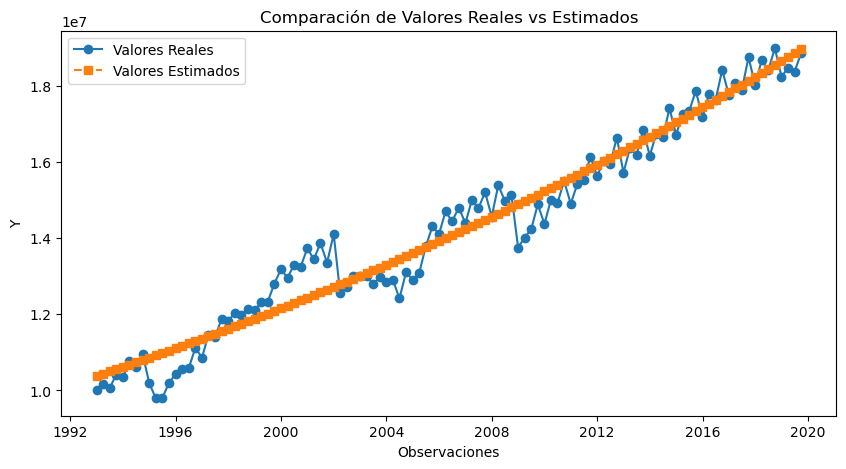

In [19]:

Y_estimated = beta1_opt * np.exp(beta2_opt * X)
y_est_train = pd.DataFrame(Y_estimated, index=y_train.index, columns=['prediction'])

# Gráfica
plt.figure(figsize=(10, 5))
plt.plot(y_train, label='Valores Reales', marker='o')
plt.plot(y_est_train, label='Valores Estimados', marker='s', linestyle='dashed')
plt.xlabel('Observaciones')
plt.ylabel('Y')
plt.legend()
plt.title('Comparación de Valores Reales vs Estimados')
plt.show()

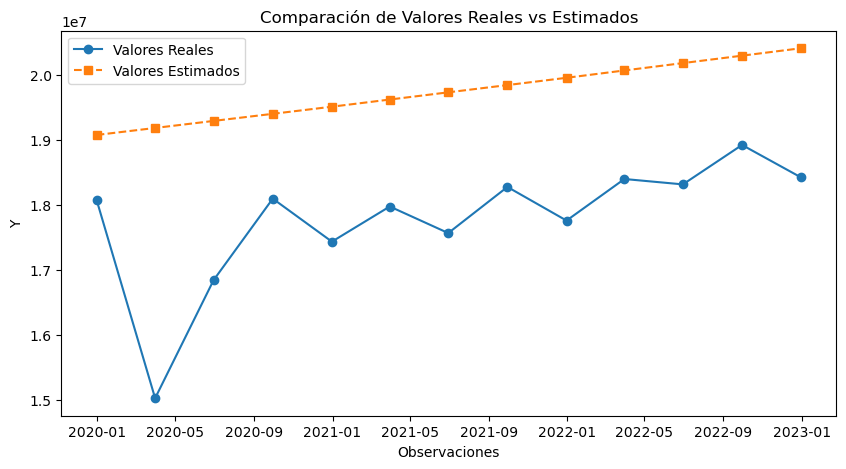

In [20]:
y_test_est = model((x_test), *param_opt)
y_test_est2 = beta1_final * np.exp(beta2_final * x_test)

plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Valores Reales', marker='o')
plt.plot(y_test_est, label='Valores Estimados', marker='s', linestyle='dashed')
plt.xlabel('Observaciones')
plt.ylabel('Y')
plt.legend()
plt.title('Comparación de Valores Reales vs Estimados')
plt.show()

In [21]:
from sklearn.metrics import r2_score

r2_score(y_train, y_est_train)

0.9553878088432509

In [22]:
y_est_tes = pd.DataFrame(Y_estimated, index=y_train.index, columns=['prediction'])
y_est_tes.head()

,prediction
Dates,
1992-12-31,1.038222e+07
1993-03-31,1.044085e+07
1993-06-30,1.049981e+07
1993-09-30,1.055911e+07
1993-12-31,1.061874e+07


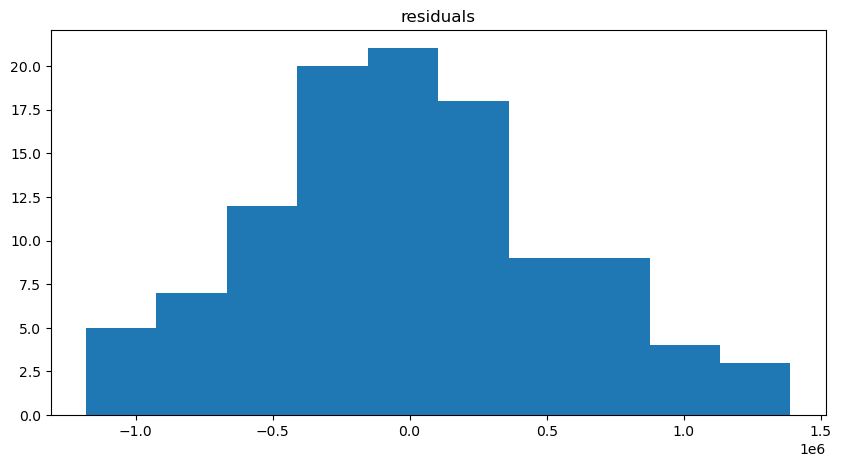

In [23]:
residuals = y_train['value'] - y_est_tes['prediction']

plt.figure(figsize=(10, 5))
plt.hist(residuals)
plt.title('residuals')
plt.show()

In [24]:
from statsmodels.stats.diagnostic import acorr_ljungbox

acorr_ljungbox(residuals)  

,lb_stat,lb_pvalue
1,40.130404,2.375626e-10
2,93.539237,4.877673e-21
3,109.461759,1.432738e-23
4,142.068934,1.017802e-29
5,145.897977,9.964344e-30
6,153.617302,1.328998e-30
7,153.626392,7.024976e-30
8,157.027801,6.687008e-30
9,159.248136,1.064106e-29
10,160.684669,2.340038e-29


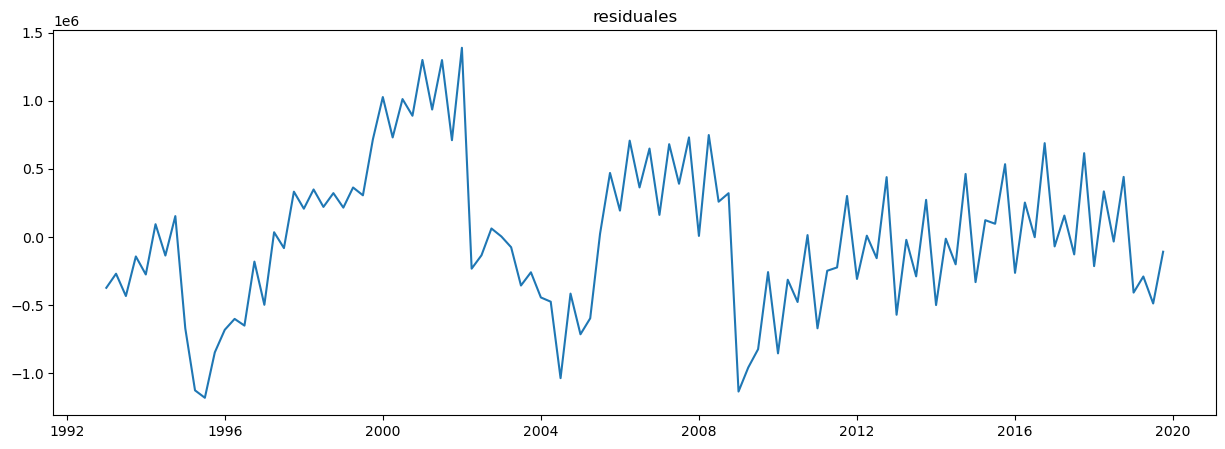

In [25]:
plt.figure(figsize=(15,5))
plt.plot(residuals)
plt.title('residuales')
plt.show()

#### seasonal integration

In [26]:
def fourier_features(index, freq, order):
    time = np.arange(len(index), dtype=np.float32)
    k = 2 * np.pi * (1 / freq) * time
    features = {}
    for i in range(1, order + 1):
        features.update({
            f"sin_{freq}_{i}": np.sin(i * k),
            f"cos_{freq}_{i}": np.cos(i * k),
        })
    return pd.DataFrame(features, index=index)


In [27]:
features = fourier_features(y_train.index, freq=4, order=6) 
features['trend'] = x_train['trend']

In [28]:
len(features.columns)

13

In [29]:


def exp_model(X, alpha, b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11, b12, b13):
    return alpha * np.exp(
        b1 * X[:, 0] + b2 * X[:, 1] + b3 * X[:, 2] + b4 * X[:, 3] +
        b5 * X[:, 4] + b6 * X[:, 5] + b7 * X[:, 6] + b8 * X[:, 7] +
        b9 * X[:, 8] + b10 * X[:, 9] + b11 * X[:, 10] + 
        b12 * X[:, 11] + b13 * X[:, 12]
    )

# Ajustamos el modelo
np.random.seed(90)
# betas 
betas = np.random.rand(14)

popt, _ = curve_fit(exp_model, features.values, y_train['value'], p0= betas)

print("Coeficientes estimados:")
print(popt)

Coeficientes estimados:
[ 2.05700824e+01  2.57255650e+01 -5.61898803e+00  1.27358176e+01
  1.93915911e+03  4.33328473e+01 -7.01845693e-01 -1.06267799e+00
 -1.34132892e+02  1.81324979e+01  8.21808428e+00 -9.72368998e-01
 -1.93860556e+03  2.58051422e-01]


In [30]:
alpha = popt[0]
betas = popt[1:]

print(alpha)
print(betas)


20.570082395134726
[ 2.57255650e+01 -5.61898803e+00  1.27358176e+01  1.93915911e+03
  4.33328473e+01 -7.01845693e-01 -1.06267799e+00 -1.34132892e+02
  1.81324979e+01  8.21808428e+00 -9.72368998e-01 -1.93860556e+03
  2.58051422e-01]


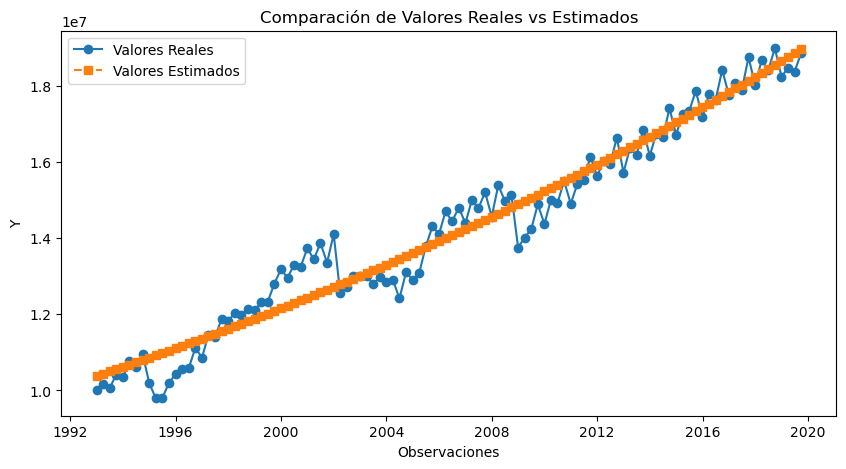

In [31]:

y_estimated= alpha * np.exp(betas * features.values)
y_est_train = pd.DataFrame(Y_estimated, index=y_train.index, columns=['prediction'])

# Gráfica
plt.figure(figsize=(10, 5))
plt.plot(y_train, label='Valores Reales', marker='o')
plt.plot(y_est_train, label='Valores Estimados', marker='s', linestyle='dashed')
plt.xlabel('Observaciones')
plt.ylabel('Y')
plt.legend()
plt.title('Comparación de Valores Reales vs Estimados')
plt.show()

In [32]:
r2_score(y_train['value'], y_est_train['prediction'])

0.9553878088432509

In [33]:
features = fourier_features(y_train.index, freq=4, order=15) 
features['trend'] = x_train['trend']

betas = len(features.columns)

In [62]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

def ajustar_modelo_exponencial(df, num_betas, y_est , random_seed=42):
    """
    Ajusta un modelo exponencial a los datos de entrada.
    
    Parámetros:
    - df: DataFrame con las variables independientes y la dependiente.
    - num_betas: Número total de betas a ajustar (incluyendo alpha).
    - random_seed: Semilla aleatoria para la inicialización de parámetros.
    
    Retorna:
    - popt: Lista de betas óptimas encontradas.
    """

    np.random.seed(random_seed)  # Fijar la semilla para reproducibilidad

    # Separar X (variables independientes) y y (variable dependiente)
    X = df.iloc[:, :-1].values  # Todas las columnas excepto la última
    y = y_est  # Última columna como variable dependiente

    # Definir la función del modelo exponencial
    def exp_model(X, *params):
        alpha = params[0]  # Primer parámetro (factor multiplicativo)
        betas = params[1:]  # Resto de los coeficientes
        return alpha * np.exp(np.dot(X, betas))  # Exponencial de la combinación lineal

    # Inicializar parámetros aleatorios en un rango adecuado
    p0 = np.random.uniform(-1, 15, num_betas)

    # Ajustar el modelo con más iteraciones permitidas
    popt ,_ = curve_fit(exp_model, X, y, p0=p0, maxfev=10000)

    return popt



In [63]:
popt = ajustar_modelo_exponencial(features, y_est=y_train['value'], num_betas=betas, random_seed=100)

print(popt) 

[ 5.84945382e+04  2.17934721e+00 -2.04105931e+03  1.02703892e+01
  3.11322187e+02  9.26500103e-01  8.58063564e+02  1.06501757e+01
  2.72071375e-02  6.02915852e+00 -1.37358233e+01  2.80163546e+00
  3.58909476e+03  1.29732978e+00  4.63902663e+00  1.41544472e+01
  6.27155646e+02  2.38187547e+00 -2.09417269e+02  4.66667909e+00
  5.12804044e+02  1.41806470e+01  2.16702458e+00  4.11936877e+00
 -7.48524686e+02  5.18380471e+00  1.30834798e+03  3.16076237e+00
 -4.53392407e+03 -6.23399424e-01  3.41945618e+02]


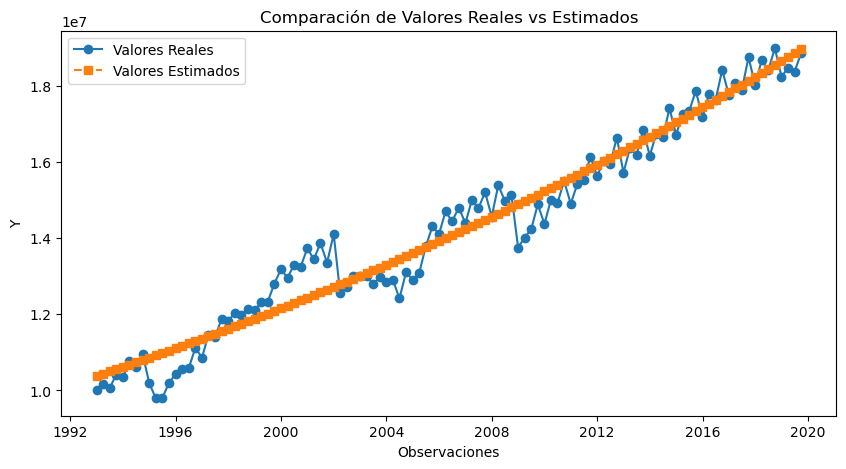

In [64]:
y_estimated= popt[30] * np.exp(popt * features.values)
y_est_train = pd.DataFrame(Y_estimated, index=y_train.index, columns=['prediction'])

# Gráfica
plt.figure(figsize=(10, 5))
plt.plot(y_train, label='Valores Reales', marker='o')
plt.plot(y_est_train, label='Valores Estimados', marker='s', linestyle='dashed')
plt.xlabel('Observaciones')
plt.ylabel('Y')
plt.legend()
plt.title('Comparación de Valores Reales vs Estimados')
plt.show()

In [65]:
r2_score(y_train['value'], y_est_train['prediction'])

0.9553878088432509

### Seasonal dummyes 

In [66]:
df_season = pd.get_dummies(df,columns=['Trimestres'], drop_first=True, dtype= float)
df_season = df_season[["Trimestres_Trimestre 2", "Trimestres_Trimestre 3", "Trimestres_Trimestre 4"]]
df_season.head()

,Trimestres_Trimestre 2,Trimestres_Trimestre 3,Trimestres_Trimestre 4
0,0.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,0.0


In [67]:
from sklearn.model_selection import train_test_split

S_train, S_test, y_train, y_test = train_test_split(df_season,df_pib, test_size=0.1, shuffle=False)
S_train['trend'] = np.arange(1, len(S_train['Trimestres_Trimestre 2']) + 1)
S_train.head()

,Trimestres_Trimestre 2,Trimestres_Trimestre 3,Trimestres_Trimestre 4,trend
0,0.0,0.0,0.0,1
1,1.0,0.0,0.0,2
2,0.0,1.0,0.0,3
3,0.0,0.0,1.0,4
4,0.0,0.0,0.0,5


In [68]:
print(S_train.shape)
print(y_train.shape)

(108, 4)
(108, 1)


In [72]:

s_opts = ajustar_modelo_exponencial(S_train, y_est=y_train['value'], num_betas=4, random_seed=500)


In [73]:
s_opts

array([1.38738172e+07, 3.02955281e-02, 2.21902283e-02, 5.34389352e-02])

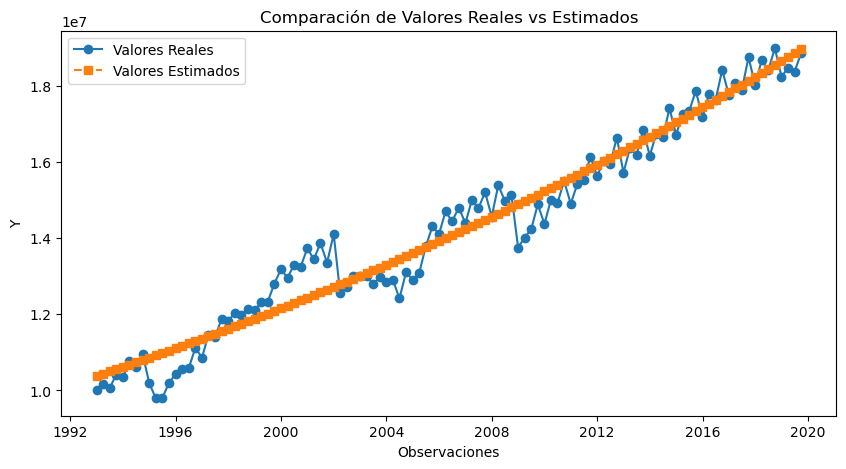

In [75]:
y_estimated= s_opts[3] * np.exp(s_opts * S_train.values)
y_est_train = pd.DataFrame(Y_estimated, index=y_train.index, columns=['prediction'])

# Gráfica
plt.figure(figsize=(10, 5))
plt.plot(y_train, label='Valores Reales', marker='o')
plt.plot(y_est_train, label='Valores Estimados', marker='s', linestyle='dashed')
plt.xlabel('Observaciones')
plt.ylabel('Y')
plt.legend()
plt.title('Comparación de Valores Reales vs Estimados')
plt.show()

In [45]:
y_train

,value
Dates,
1992-12-31,1.000889e+07
1993-03-31,1.017104e+07
1993-06-30,1.006626e+07
1993-09-30,1.041610e+07
1993-12-31,1.034339e+07
...,...
2018-09-30,1.898491e+07
2018-12-31,1.824008e+07
2019-03-31,1.846351e+07
